# Word Cloud

For this project, I'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of my script, I have a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like. You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now I will upload the input file here so that my script will be able to process it.  To do the upload, I will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once I get the following final line of output, the code is done executing. Then will continue on with the rest of for this notebook.

In [1]:
import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

### If you don't have above libraries, you can install using below commands

!pip install wordcloud <br></br>
!pip install fileupload<br></br>
!pip install ipywidgets<br></br>
!jupyter nbextension install --py --user fileupload<br></br>
!jupyter nbextension enable --py fileupload

All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>

To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [3]:
# This is the uploader widget

def upload():

    text_file = fileupload.FileUploadWidget()

    def cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    text_file.observe(cb, names='data')
    display(text_file)

upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `Marta by Eliza Book.txt` (469.60 kB)


The uploader widget saved the contents of uploaded file into a string object named *file_contents* that  word cloud script can process. This was a lot of preliminary work, but I am now ready to begin  script. 

Function below will iterate through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [4]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    d = {}
    c=0
    
    for i in file_contents.split():
        i = i.lower()
        if i in punctuations or i in uninteresting_words:
            pass
        else:
            if i not in d:
                d[i]=0
            d[i]+=1   
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(d)
    return cloud.to_array()

If I have done everything correctly, the word cloud image should appear after running the cell below. <br></br> **Fingers crossed!**

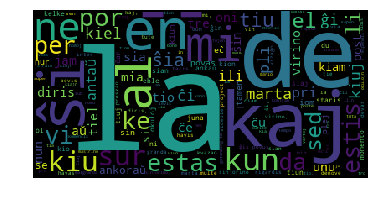

In [5]:
# Display wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

Hurray!